<a href="https://colab.research.google.com/github/DavidCastroPena/credit-models/blob/model_1_XGBBoostSurvival/FinalProject__XGBoostSurvival_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.utils import resample
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import xgboost as xgb

# First attempt with folder ID
path1_10_present = '/content/drive/My Drive/11S7cbE_9RF5lE2TuDVrIgcdrRnwJjwTY/10_present.csv'
path1_91_09 = '/content/drive/My Drive/11S7cbE_9RF5lE2TuDVrIgcdrRnwJjwTY/91_09.csv'

# Second attempt with folder name
path2_10_present = '/content/drive/My Drive/MS&E246/10_present.csv'
path2_91_09 = '/content/drive/My Drive/MS&E246/91_09.csv'

# Try reading with both paths
try:
    # Try first path
    df_10_present = pd.read_csv(path1_10_present)
    df_91_09 = pd.read_csv(path1_91_09)
    print("Successfully read from folder ID path")
except:
    try:
        # Try second path
        df_10_present = pd.read_csv(path2_10_present)
        df_91_09 = pd.read_csv(path2_91_09)
        print("Successfully read from folder name path")
    except Exception as e:
        print(f"Error: {e}")

<ipython-input-61-f344019cc8f5>:27: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df_10_present = pd.read_csv(path2_10_present)


Successfully read from folder name path


<ipython-input-61-f344019cc8f5>:28: DtypeWarning: Columns (12,13,14,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_91_09 = pd.read_csv(path2_91_09)


In [ ]:
import pandas as pd

# File paths
path1_10_present = '/content/drive/My Drive/11S7cbE_9RF5lE2TuDVrIgcdrRnwJjwTY/10_present.csv'
path1_91_09 = '/content/drive/My Drive/11S7cbE_9RF5lE2TuDVrIgcdrRnwJjwTY/91_09.csv'

path2_10_present = '/content/drive/My Drive/MS&E246/10_present.csv'
path2_91_09 = '/content/drive/My Drive/MS&E246/91_09.csv'

# Attempt to read the datasets from the first paths, then fallback to second paths if needed
try:
    df_10_present = pd.read_csv(path1_10_present)
    df_91_09 = pd.read_csv(path1_91_09)
    print("Successfully read from folder ID path")
except:
    try:
        df_10_present = pd.read_csv(path2_10_present)
        df_91_09 = pd.read_csv(path2_91_09)
        print("Successfully read from folder name path")
    except Exception as e:
        print(f"Error: {e}")

# Align columns (ensure both datasets have the same column order and names)
# Find common columns
common_columns = list(set(df_10_present.columns).intersection(set(df_91_09.columns)))
df_10_present = df_10_present[common_columns]
df_91_09 = df_91_09[common_columns]

# Concatenate the datasets (91_09 above, 10_present below)
df_combined = pd.concat([df_91_09, df_10_present], ignore_index=True)

# Output the shape and preview of the combined dataframe
print(f"Combined dataset shape: {df_combined.shape}")
print(df_combined.head())

# Save the combined dataset to a new file if needed
output_path = '/content/drive/My Drive/MS&E246/combined_dataset.csv'
df_combined.to_csv(output_path, index=False)
print(f"Combined dataset saved to: {output_path}")


<ipython-input-62-b84f50aac373>:17: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df_10_present = pd.read_csv(path2_10_present)
<ipython-input-62-b84f50aac373>:18: DtypeWarning: Columns (12,13,14,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_91_09 = pd.read_csv(path2_91_09)


Successfully read from folder name path
Combined dataset shape: (218095, 38)
   NaicsCode FranchiseName ApprovalDate        NaicsDescription  \
0      0.000           NaN    8/26/1991                     NaN   
1      0.000           NaN    8/26/1991                     NaN   
2 448140.000           NaN    8/26/1991  Family Clothing Stores   
3      0.000           NaN    2/26/1991                     NaN   
4      0.000           NaN    11/2/1990                     NaN   

                   BorrStreet  GrossApproval  ThirdPartyDollars  BorrZip  \
0      6335 NANCY RIDGE DRIVE     175000.000                NaN    92121   
1         2250 S. WEST TEMPLE     231000.000                NaN    84115   
2            36 EAST BROADWAY     370000.000                NaN    83001   
3   SOUTHWIND MARITIME CENTER     561000.000                NaN    47620   
4  NORTH POINTE COMMONS LOT 6     310000.000                NaN    46514   

         CDC_City PaidInFullDate  ... LoanStatus ApprovalFiscal

Concatenating two files

In [ ]:
df_combined = pd.concat([df_91_09, df_10_present], ignore_index=True)
print(f"Combined dataset shape: {df_combined.shape}")
print(df_combined.head())

# Save the combined dataset to a new file if needed
output_path = '/content/drive/My Drive/MS&E246/combined_dataset.csv'
df_combined.to_csv(output_path, index=False)
print(f"Combined dataset saved to: {output_path}")

Combined dataset shape: (218095, 38)
   NaicsCode FranchiseName ApprovalDate        NaicsDescription  \
0      0.000           NaN    8/26/1991                     NaN   
1      0.000           NaN    8/26/1991                     NaN   
2 448140.000           NaN    8/26/1991  Family Clothing Stores   
3      0.000           NaN    2/26/1991                     NaN   
4      0.000           NaN    11/2/1990                     NaN   

                   BorrStreet  GrossApproval  ThirdPartyDollars  BorrZip  \
0      6335 NANCY RIDGE DRIVE     175000.000                NaN    92121   
1         2250 S. WEST TEMPLE     231000.000                NaN    84115   
2            36 EAST BROADWAY     370000.000                NaN    83001   
3   SOUTHWIND MARITIME CENTER     561000.000                NaN    47620   
4  NORTH POINTE COMMONS LOT 6     310000.000                NaN    46514   

         CDC_City PaidInFullDate  ... LoanStatus ApprovalFiscalYear  \
0       San Diego      5/31/2005

30,641 CANCLD loans. Q1: IF loanstatus=chgoff & grosschargeoff different from 0; should be removed? Q2: missing values was created based on whether loanstatus is empty. is this right?

In [ ]:

# Load the combined dataset
combined_path = '/content/drive/My Drive/MS&E246/combined_dataset.csv'
df = pd.read_csv(combined_path)

# Step 1: Create a copy of the dataset
df_cleaned = df.copy()
print(f"Initial dataset shape: {df_cleaned.shape}")

# Step 2: Remove loans labeled "Canceled"
if 'LoanStatus' in df_cleaned.columns:
    df_cleaned = df_cleaned[df_cleaned['LoanStatus'] != 'CANCLD']
    print(f"After removing 'Canceled' loans: {df_cleaned.shape}")
else:
    print("'LoanStatus' column not found. Skipping 'Canceled' filtering.")

# Step 3: Handle blank or missing LoanStatus
# Create a binary variable `missingStatus`
if 'LoanStatus' in df_cleaned.columns:
    df_cleaned['missingStatus'] = df_cleaned['LoanStatus'].isnull() | (df_cleaned['LoanStatus'].str.strip() == "")
    df_cleaned['missingStatus'] = df_cleaned['missingStatus'].astype(int)
    print(f"After creating 'missingStatus': {df_cleaned.shape}")
    print(f"Number of rows with missing statuses: {df_cleaned['missingStatus'].sum()}")
else:
    print("'LoanStatus' column not found. Skipping 'missingStatus' creation.")

# Step 4: Save the updated dataset
updated_path = '/content/drive/My Drive/MS&E246/cleaned_with_missing_status.csv'
df_cleaned.to_csv(updated_path, index=False)
print(f"Updated dataset saved to: {updated_path}")



<ipython-input-64-6a3024ae9c8b>:3: DtypeWarning: Columns (12,13,25,26,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(combined_path)


Initial dataset shape: (218095, 38)
After removing 'Canceled' loans: (187454, 38)
After creating 'missingStatus': (187454, 39)
Number of rows with missing statuses: 350
Updated dataset saved to: /content/drive/My Drive/MS&E246/cleaned_with_missing_status.csv


In [ ]:
#Normalization

# Define continuous variables for normalization
continuous_vars = ['GrossApproval', 'TermInMonths', 'ApprovalFiscalYear', 'JobsSupported', 'UnemploymentRate']

# Check if all continuous variables exist in the dataset before applying normalization
existing_continuous_vars = [col for col in continuous_vars if col in df_cleaned.columns]

# Apply normalization only to existing columns
if existing_continuous_vars:
    scaler = MinMaxScaler()
    df_cleaned[existing_continuous_vars] = scaler.fit_transform(df_cleaned[existing_continuous_vars])
    print("Normalization applied successfully.")
else:
    print("No continuous variables found for normalization.")

# Add the "Default" variable for classification (keeps next block unchanged)
df_cleaned['Default'] = df_cleaned['LoanStatus'].apply(lambda x: 1 if x == 'CHGOFF' else 0)

# Check distribution of "Default"
default_distribution = df_cleaned['Default'].value_counts()
print(f"Default distribution:\n{default_distribution}")

# Save the dataset **without breaking the next block**
updated_path = '/content/drive/My Drive/MS&E246/cleaned_with_defaults.csv'
df_cleaned.to_csv(updated_path, index=False)
print(f"Updated dataset with normalization and 'Default' variable saved to: {updated_path}")



Normalization applied successfully.
Default distribution:
Default
0    175376
1     12078
Name: count, dtype: int64
Updated dataset with normalization and 'Default' variable saved to: /content/drive/My Drive/MS&E246/cleaned_with_defaults.csv


In [ ]:
#Model Splitting should be done by calendar dates
'''
Proposed Splitting Strategy
To create training, validation, and testing sets that align with these economic shifts, split the data based on these crises:

Training Set (Pre-Crisis Stability and Dot-Com Era):
Timeframe: 1990–2006.
Rationale: This period includes relatively stable economic years, the Dot-Com bubble, and its aftermath. Training the model on this data helps it learn patterns from normal and mildly volatile periods.

Validation Set (2007–2015, Financial Crisis and Recovery):
Timeframe: 2007–2015.
Rationale: Includes the 2007–2008 financial crisis, the subsequent Great Recession, and the recovery phase. This period helps validate how well the model generalizes to high-stress financial environments.

Testing Set (COVID-19 Pandemic and Current Data):
Timeframe: 2016–2024.
Rationale: Includes recent years leading up to and during the COVID-19 pandemic, as well as the post-pandemic recovery. This evaluates the model's robustness on recent economic disruptions.
'''



"\nProposed Splitting Strategy\nTo create training, validation, and testing sets that align with these economic shifts, split the data based on these crises:\n\nTraining Set (Pre-Crisis Stability and Dot-Com Era):\nTimeframe: 1990–2006.\nRationale: This period includes relatively stable economic years, the Dot-Com bubble, and its aftermath. Training the model on this data helps it learn patterns from normal and mildly volatile periods.\n\nValidation Set (2007–2015, Financial Crisis and Recovery):\nTimeframe: 2007–2015.\nRationale: Includes the 2007–2008 financial crisis, the subsequent Great Recession, and the recovery phase. This period helps validate how well the model generalizes to high-stress financial environments.\n\nTesting Set (COVID-19 Pandemic and Current Data):\nTimeframe: 2016–2024.\nRationale: Includes recent years leading up to and during the COVID-19 pandemic, as well as the post-pandemic recovery. This evaluates the model's robustness on recent economic disruptions.\n"

In [ ]:
# Feature selection: two strategies--using Kai's Chi2 test and via logistic regression using literature suggested variables

'''
PIF: Paid In Full.
CANCLD: Canceled.
CHGOFF: Charged Off (Default).
nan: Missing/Not Available.
EXEMPT: Exempt (special status, possibly regulatory or administrative).
If you are focusing on predicting defaults, you would typically:

Treat CHGOFF as a default (1).
Treat PIF and potentially EXEMPT as non-defaults (0).
Exclude or handle CANCLD and missing values (nan) separately, depending on their role in your analysis.
'''

# Add the binary "Default" variable
# 1 for "CHGOFF" (default), 0 for "PIF" or "EXEMPT"
df_cleaned['Default'] = df_cleaned['LoanStatus'].apply(lambda x: 1 if x == 'CHGOFF' else 0)

# Check the distribution of the new "Default" variable
default_distribution = df_cleaned['Default'].value_counts()
print(f"Default distribution:\n{default_distribution}")

# Save the updated dataset
updated_path = '/content/drive/My Drive/MS&E246/cleaned_with_defaults.csv'
df_cleaned.to_csv(updated_path, index=False)
print(f"Updated dataset with 'Default' variable saved to: {updated_path}")




Default distribution:
Default
0    175376
1     12078
Name: count, dtype: int64
Updated dataset with 'Default' variable saved to: /content/drive/My Drive/MS&E246/cleaned_with_defaults.csv


In [ ]:
#Feature analysis: logit(P (Default=1))= b0+b1GrossAproval+B2*TermInMonths+B3*NaicsCode=B4ApprovalFiscalYear+B5JobsSupported+B6NaicsDescription

#B6 is high dimensional. so lets prompt gemini to reduce the dimensionality of B6

# Load the dataset
data_path = '/content/drive/My Drive/MS&E246/cleaned_with_defaults.csv'
df = pd.read_csv(data_path, low_memory=False)

# NAICS code mappings to Sectors
naics_mapping = {
    '11': 'Agriculture',       # Agriculture, Forestry, Fishing, and Hunting
    '21': 'Mining',            # Mining, Quarrying, and Oil and Gas Extraction
    '22': 'Utilities',         # Utilities
    '23': 'Construction',      # Construction
    '31': 'Manufacturing',     # Manufacturing
    '32': 'Manufacturing',     # Manufacturing
    '33': 'Manufacturing',     # Manufacturing
    '42': 'Wholesale Trade',   # Wholesale Trade
    '44': 'Retail Trade',      # Retail Trade
    '45': 'Retail Trade',      # Retail Trade
    '48': 'Transportation',    # Transportation and Warehousing
    '49': 'Transportation',    # Transportation and Warehousing
    '51': 'Information',       # Information
    '52': 'Finance',           # Finance and Insurance
    '53': 'Real Estate',       # Real Estate and Rental and Leasing
    '54': 'Services',          # Professional, Scientific, and Technical Services
    '55': 'Management',        # Management of Companies and Enterprises
    '56': 'Administrative',    # Administrative and Support and Waste Management
    '61': 'Services',          # Educational Services
    '62': 'Services',          # Health Care and Social Assistance
    '71': 'Entertainment',     # Arts, Entertainment, and Recreation
    '72': 'Hospitality',       # Accommodation and Food Services
    '81': 'Other',             # Other Services (except Public Administration)
    '92': 'Public',            # Public Administration
}

# Helper function to map NAICS codes to Sectors
def map_naics_code(code):
    try:
        if pd.notnull(code) and float(code) != 0.0:  # Exclude invalid codes
            code = str(int(float(code)))  # Convert to string
            naics_prefix = code[:2]  # Get the first 2 digits
            return naics_mapping.get(naics_prefix, "Other")  # Map to category
        return "Other"  # Default for missing or invalid codes
    except ValueError:
        return "Other"  # Handle unexpected non-numeric values

# Map NaicsCode to Sectors
df['Sector'] = df['NaicsCode'].apply(map_naics_code)

# Display unique values in the Sector column
if 'Sector' in df.columns:
    unique_sectors = df['Sector'].unique()
    print("Unique values in 'Sector' column:")
    print(unique_sectors)
    print(f"Total unique values: {len(unique_sectors)}")
else:
    print("The 'Sector' column is not present in the dataset.")

# One-hot encode the Sector column
df_encoded = pd.get_dummies(df, columns=['Sector'], prefix='Sector', drop_first=False)

# Correct the one-hot encoded columns by replacing True/False with 1/0
sector_columns = [col for col in df_encoded.columns if col.startswith('Sector_')]
df_encoded[sector_columns] = df_encoded[sector_columns].replace({False: 0, True: 1})

# Save the updated dataset with corrected sector columns
output_path = '/content/drive/My Drive/MS&E246/cleaned_with_encoded_sector_corrected.csv'
df_encoded.to_csv(output_path, index=False)

# Print confirmation and dataset details
print(f"\nUpdated dataset with corrected sector columns saved to: {output_path}")
print(f"Shape of the dataset after encoding: {df_encoded.shape}")
print("\nColumns in the dataset after encoding:")
print(df_encoded.columns.tolist())

# Verify the encoding
print("\nSector column verification:")
for col in sector_columns:
    print(f"{col}: Unique values -> {df_encoded[col].unique()}")


Unique values in 'Sector' column:
['Other' 'Retail Trade' 'Wholesale Trade' 'Manufacturing' 'Administrative'
 'Agriculture' 'Construction' 'Services' 'Transportation' 'Information'
 'Mining' 'Entertainment' 'Real Estate' 'Hospitality' 'Public' 'Utilities'
 'Management' 'Finance']
Total unique values: 18


<ipython-input-68-06a588991ff5>:65: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded[sector_columns] = df_encoded[sector_columns].replace({False: 0, True: 1})



Updated dataset with corrected sector columns saved to: /content/drive/My Drive/MS&E246/cleaned_with_encoded_sector_corrected.csv
Shape of the dataset after encoding: (187454, 58)

Columns in the dataset after encoding:
['NaicsCode', 'FranchiseName', 'ApprovalDate', 'NaicsDescription', 'BorrStreet', 'GrossApproval', 'ThirdPartyDollars', 'BorrZip', 'CDC_City', 'PaidInFullDate', 'SBADistrictOffice', 'ProjectState', 'BusinessAge', 'ThirdPartyLender_State', 'Program', 'BorrState', 'AsOfDate', 'CDC_Street', 'JobsSupported', 'Subprogram', 'ChargeOffDate', 'DeliveryMethod', 'BorrName', 'BorrCity', 'FirstDisbursementDate', 'ThirdPartyLender_City', 'ThirdPartyLender_Name', 'CongressionalDistrict', 'LoanStatus', 'ApprovalFiscalYear', 'CDC_Name', 'GrossChargeOffAmount', 'BusinessType', 'FranchiseCode', 'CDC_State', 'CDC_Zip', 'ProjectCounty', 'TermInMonths', 'missingStatus', 'Default', 'Sector_Administrative', 'Sector_Agriculture', 'Sector_Construction', 'Sector_Entertainment', 'Sector_Finance',

In [ ]:
####################Iogistic regression to choose features#####################################

normalized_path = '/content/drive/My Drive/MS&E246/cleaned_with_encoded_sector_corrected.csv'
df = pd.read_csv(normalized_path, low_memory=False)

# Ensure the 'Default' column exists
if 'Default' not in df.columns:
    raise ValueError("Error: 'Default' column not found. Ensure the previous block created it correctly.")

# Separate majority (non-default) and minority (default) classes
df_majority = df[df['Default'] == 0]
df_minority = df[df['Default'] == 1]

# Undersample the majority class
df_majority_undersampled = resample(df_majority,
                                    replace=False,  # Sample without replacement
                                    n_samples=len(df_minority),  # Match minority class size
                                    random_state=42)  # Reproducibility

# Combine undersampled majority class with the minority class
df_balanced = pd.concat([df_majority_undersampled, df_minority])

# Shuffle the data
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Define independent and dependent variables
dependent_var = 'Default'  # Define the target variable
shared_vars = ['GrossApproval', 'TermInMonths', 'ApprovalFiscalYear', 'JobsSupported']

# Dynamically find all `Sector_*` columns
sector_columns = [col for col in df_balanced.columns if col.startswith('Sector_')]

# Drop ONE sector to avoid perfect multicollinearity
sector_columns = [col for col in sector_columns if col != 'Sector_Other']  # Example: Drop 'Sector_Other'

# Define independent variables (shared + all but one sector)
independent_vars = shared_vars + sector_columns

# Prepare dataset
df_subset = df_balanced[[dependent_var] + independent_vars].dropna()

# Ensure there are enough rows
if df_subset.shape[0] < 10:
    raise ValueError("Too few data points after dropping NAs.")

X = df_subset[independent_vars]
y = df_subset[dependent_var]

# Add constant term
X = sm.add_constant(X)

# Fit logistic regression with a different optimizer (Newton-Raphson)
try:
    model = sm.Logit(y, X)
    result = model.fit(method='newton')  # Use 'newton' or 'bfgs' optimizer
    print(result.summary())
except Exception as e:
    print(f"Error fitting logistic regression: {e}")



Optimization terminated successfully.
         Current function value: 0.601057
         Iterations 6
Error fitting logistic regression: Singular matrix


In [ ]:

#######Following Frank's suggestion of improving logistic regression by including all covariates and adressing singular matrix with diff
#logistic regression optimizers
def fit_improved_logistic_regression(df):
    """
    Fits an improved logistic regression model addressing multicollinearity
    and perfect separation issues. Assumes continuous variables are already normalized.
    """
    # 1. Select features (already normalized)
    base_features = ['GrossApproval', 'TermInMonths', 'ApprovalFiscalYear', 'JobsSupported']
    sector_features = [col for col in df.columns if col.startswith('Sector_')]

    # 2. Drop one sector to avoid perfect multicollinearity
    sector_features = sector_features[:-1]  # Drop the last sector

    # 3. Handle class imbalance
    df_majority = df[df['Default'] == 0]
    df_minority = df[df['Default'] == 1]

    # Undersample majority class
    df_majority_undersampled = resample(df_majority,
                                      replace=False,
                                      n_samples=len(df_minority),
                                      random_state=42)

    # Combine balanced dataset
    df_balanced = pd.concat([df_majority_undersampled, df_minority])

    # 4. Prepare final feature set
    X = df_balanced[base_features + sector_features]
    y = df_balanced['Default']

    # 5. Add constant term
    X = sm.add_constant(X)

    # 6. Fit model with robust initialization
    model = sm.Logit(y, X)

    # Try different optimization methods
    methods = ['newton', 'bfgs', 'lbfgs']
    result = None

    for method in methods:
        try:
            result = model.fit(method=method, maxiter=100)
            break
        except:
            print(f"Method {method} failed, trying next method...")
            continue

    if result is None:
        raise Exception("All optimization methods failed")

    return result, base_features + sector_features

def print_model_diagnostics(result, feature_names):
    """
    Prints detailed model diagnostics.
    """
    print("\nModel Summary:")
    print(result.summary())

    # Print odds ratios
    print("\nOdds Ratios:")
    odds_ratios = pd.DataFrame({
        'Feature': feature_names,
        'Odds Ratio': np.exp(result.params[1:]),
        'CI Lower': np.exp(result.conf_int()[0][1:]),
        'CI Upper': np.exp(result.conf_int()[1][1:])
    })
    print(odds_ratios)

    # Print model fit statistics
    print("\nModel Fit Statistics:")
    print(f"Pseudo R-squared: {result.prsquared:.4f}")
    print(f"AIC: {result.aic:.4f}")
    print(f"BIC: {result.bic:.4f}")

# Mount Google Drive and load data
from google.colab import drive
drive.mount('/content/drive')

# Now execute the analysis with your data
normalized_path = '/content/drive/My Drive/MS&E246/cleaned_with_encoded_sector_corrected.csv'
df = pd.read_csv(normalized_path, low_memory=False)

# Run the improved logistic regression
result, feature_names = fit_improved_logistic_regression(df)
print_model_diagnostics(result, feature_names)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Optimization terminated successfully.
         Current function value: 0.601057
         Iterations 6
Method newton failed, trying next method...
         Current function value: 0.601155
         Iterations: 100
         Function evaluations: 102
         Gradient evaluations: 102

Model Summary:
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                24156
Model:                          Logit   Df Residuals:                    24135
Method:                           MLE   Df Model:                           20
Date:                Tue, 04 Feb 2025   Pseudo R-squ.:                  0.1327
Time:                        01:58:24   Log-Likelihood:                -14522.
converged:                      False   LL-Null:                       -16744.
Covariance Type:   

/usr/local/lib/python3.11/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
'''
From the previous errors notes
Convergence Issues:


The Newton method failed and BFGS hit maximum iterations
We got convergence warnings and optimization warnings
There's an overflow warning in exp calculations


Model Fit Results:


Pseudo R-squared is 0.1327, indicating moderate predictive power
Some sectors show very significant effects (e.g., Hospitality with odds ratio 3.39)
Some variables show extremely high standard errors (e.g., JobsSupported)

Let me create an improved version that addresses these issues:Improved Logistic Regression with Better ConvergenceClick to open codeKey improvements made:

Convergence Handling:


Removed sectors with perfect separation or very few observations
Increased maximum iterations and improved tolerance settings
Added better error handling for optimization


Class Imbalance:


Modified the undersampling ratio to 0.8 instead of 1.0
This helps prevent overfitting to the minority class


Numerical Stability:


Added proper error handling for exp calculations
Removed problematic sectors that caused instability


Output Clarity:


Added better formatting for odds ratios
Sorted results by effect size
Added more detailed convergence information

Try running this improved version. You should see:

Better convergence
No overflow warnings
More stable coefficient estimates
Clearer interpretation of sector effects
'''



"\nFrom the previous errors notes \nConvergence Issues:\n\n\nThe Newton method failed and BFGS hit maximum iterations\nWe got convergence warnings and optimization warnings\nThere's an overflow warning in exp calculations\n\n\nModel Fit Results:\n\n\nPseudo R-squared is 0.1327, indicating moderate predictive power\nSome sectors show very significant effects (e.g., Hospitality with odds ratio 3.39)\nSome variables show extremely high standard errors (e.g., JobsSupported)\n\nLet me create an improved version that addresses these issues:Improved Logistic Regression with Better ConvergenceClick to open codeKey improvements made:\n\nConvergence Handling:\n\n\nRemoved sectors with perfect separation or very few observations\nIncreased maximum iterations and improved tolerance settings\nAdded better error handling for optimization\n\n\nClass Imbalance:\n\n\nModified the undersampling ratio to 0.8 instead of 1.0\nThis helps prevent overfitting to the minority class\n\n\nNumerical Stability:\n\

In [ ]:
#XGBoost baseline: only selecting pertient features based on logistic regression
from lifelines.utils import concordance_index
from datetime import datetime

# Load data
data_path = '/content/drive/My Drive/MS&E246/cleaned_with_encoded_sector_corrected.csv'
df = pd.read_csv(data_path, low_memory=False)

# Convert date columns to datetime
date_cols = ['ApprovalDate', 'ChargeOffDate', 'PaidInFullDate', 'AsOfDate']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Correct invalid SurvivalTime values
def calculate_survival_time(row):
    try:
        if pd.notna(row['ChargeOffDate']):
            days = max((row['ChargeOffDate'] - row['ApprovalDate']).days, 0)
        elif pd.notna(row['PaidInFullDate']):
            days = max((row['PaidInFullDate'] - row['ApprovalDate']).days, 0)
        elif pd.notna(row['AsOfDate']):
            days = max((row['AsOfDate'] - row['ApprovalDate']).days, 0)
        else:
            return None
        return days + 1 if days == 0 else days  # Ensure no zero values
    except:
        return None

# Apply survival time calculation and Event definition
df['SurvivalTime'] = df.apply(calculate_survival_time, axis=1)
df['Event'] = np.where(df['LoanStatus'] == 'CHGOFF', 1, 0)

print("Initial shape:", df.shape)

# Data cleaning
df = df[df['SurvivalTime'].notna()]
df = df[df['SurvivalTime'] > 0]

print("\nShape after cleaning invalid survival times:", df.shape)

# Define features based on logistic regression results
numeric_features = [
    'GrossApproval',          # Positive effect (OR = 1.610, p = 0.001)
    'TermInMonths',           # Strong negative effect (OR = 0.054, p < 0.001)
    'ApprovalFiscalYear',     # Strong negative effect (OR = 0.028, p < 0.001)
    'JobsSupported'           # Marginally significant (p = 0.071)
]

significant_sectors = [
    'Sector_Hospitality',     # Highest risk (OR = 3.936, p < 0.001)
    'Sector_Entertainment',   # High risk (OR = 2.866, p = 0.003)
    'Sector_Finance',        # High risk (OR = 2.525, p = 0.009)
    'Sector_Real Estate',    # High risk (OR = 2.403, p = 0.012)
    'Sector_Retail Trade',   # High risk (OR = 2.254, p = 0.017)
    'Sector_Construction'    # High risk (OR = 2.102, p = 0.031)
]

# Combine all relevant columns
relevant_columns = ['SurvivalTime', 'Event'] + numeric_features + significant_sectors

# Verify all columns exist
missing_columns = [col for col in significant_sectors if col not in df.columns]
if missing_columns:
    print("\nWarning: Missing sector columns:", missing_columns)
    # Remove missing columns from relevant_columns
    relevant_columns = [col for col in relevant_columns if col not in missing_columns]

# Filter columns and drop missing values
df = df[relevant_columns].dropna()

print("\nShape after selecting features:", df.shape)
print("\nSelected features:", df.columns.tolist())

# Split data
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(df, train_size=0.7, random_state=42)
val_df, test_df = train_test_split(temp_df, train_size=0.5, random_state=42)

print("\nDataset sizes:")
print(f"Train: {len(train_df)} (Events: {sum(train_df['Event'])})")
print(f"Validation: {len(val_df)} (Events: {sum(val_df['Event'])})")
print(f"Test: {len(test_df)} (Events: {sum(test_df['Event'])})")

# Prepare features and targets
def prepare_data(df):
    X = df.drop(['SurvivalTime', 'Event'], axis=1)
    y = df[['SurvivalTime', 'Event']]
    return X, y

X_train, y_train = prepare_data(train_df)
X_val, y_val = prepare_data(val_df)
X_test, y_test = prepare_data(test_df)

# Create XGBoost matrices
dtrain = xgb.DMatrix(X_train, label=y_train['SurvivalTime'])
dval = xgb.DMatrix(X_val, label=y_val['SurvivalTime'])
dtest = xgb.DMatrix(X_test, label=y_test['SurvivalTime'])

# XGBoost parameters
params = {
    'objective': 'survival:cox',
    'learning_rate': 0.05,
    'max_depth': 4,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_weight': 3,
    'seed': 42
}

# Train model
model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=[(dtrain, 'train'), (dval, 'validation')],
    early_stopping_rounds=10,
    verbose_eval=10
)

# Predict survival scores
y_pred = model.predict(dtest)

# Evaluate model
def evaluate_model(time, pred, event):
    try:
        c_index = concordance_index(time, -pred, event)
        print(f"\nOverall Concordance Index: {c_index:.4f}")
    except Exception as e:
        print(f"Error in concordance calculation: {str(e)}")

    print("\nEvent distribution in test set:")
    print(pd.Series(event).value_counts())
    print("\nEvent proportions:")
    print(pd.Series(event).value_counts(normalize=True))

print("\nModel Evaluation:")
evaluate_model(
    y_test['SurvivalTime'].values,
    y_pred,
    y_test['Event'].values
)

# Feature importance
importance = model.get_score(importance_type='total_gain')
importance_df = pd.DataFrame(
    sorted(importance.items(), key=lambda x: x[1], reverse=True),
    columns=['Feature', 'Importance']
)
print("\nFeature Importance:")
print(importance_df)

# Save model
model.save_model('/content/drive/My Drive/MS&E246/survival_xgboost_model.model')

Initial shape: (187454, 60)

Shape after cleaning invalid survival times: (187454, 60)

Shape after selecting features: (187453, 12)

Selected features: ['SurvivalTime', 'Event', 'GrossApproval', 'TermInMonths', 'ApprovalFiscalYear', 'JobsSupported', 'Sector_Hospitality', 'Sector_Entertainment', 'Sector_Finance', 'Sector_Real Estate', 'Sector_Retail Trade', 'Sector_Construction']

Dataset sizes:
Train: 131217 (Events: 8414)
Validation: 28118 (Events: 1863)
Test: 28118 (Events: 1801)
[0]	train-cox-nloglik:10.73984	validation-cox-nloglik:9.19962
[10]	train-cox-nloglik:10.56991	validation-cox-nloglik:9.02973
[20]	train-cox-nloglik:10.51146	validation-cox-nloglik:8.97165
[30]	train-cox-nloglik:10.48194	validation-cox-nloglik:8.94254
[40]	train-cox-nloglik:10.46282	validation-cox-nloglik:8.92375
[50]	train-cox-nloglik:10.44892	validation-cox-nloglik:8.91021
[60]	train-cox-nloglik:10.44061	validation-cox-nloglik:8.90225
[70]	train-cox-nloglik:10.43441	validation-cox-nloglik:8.89633
[80]	trai

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:59:04] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [ ]:
# Feature importance analysis
importance = model.get_score(importance_type='total_gain')
importance_df = pd.DataFrame(
    sorted(importance.items(), key=lambda x: x[1], reverse=True),
    columns=['Feature', 'Importance']
)
print("\nTop 15 Most Important Features:")
print(importance_df.head(15))

# Additional analysis of interaction effects
print("\nInteraction Features Importance:")
interaction_importance = importance_df[importance_df['Feature'].str.contains('_x_')]
print(interaction_importance)

# Save model
model.save_model('/content/drive/My Drive/MS&E246/survival_xgboost_model.model')


Top 15 Most Important Features:
                Feature  Importance
0    ApprovalFiscalYear  697171.312
1          TermInMonths   61360.984
2         GrossApproval    9580.610
3         JobsSupported    4102.878
4    Sector_Hospitality    1179.552
5    Sector_Real Estate     468.506
6   Sector_Construction     313.985
7        Sector_Finance      89.953
8   Sector_Retail Trade      24.994
9  Sector_Entertainment      11.814

Interaction Features Importance:
Empty DataFrame
Columns: [Feature, Importance]
Index: []


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:59:14] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [ ]:
#Model 2 low conconrdance model with interaction but with imbalance default and no default labels
from lifelines.utils import concordance_index

# Load data
data_path = '/content/drive/My Drive/MS&E246/cleaned_with_encoded_sector_corrected.csv'
df = pd.read_csv(data_path, low_memory=False)

# Convert date columns to datetime
date_cols = ['ApprovalDate', 'ChargeOffDate', 'PaidInFullDate', 'AsOfDate']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Calculate survival time (unchanged)
def calculate_survival_time(row):
    try:
        if pd.notna(row['ChargeOffDate']):
            days = max((row['ChargeOffDate'] - row['ApprovalDate']).days, 0)
        elif pd.notna(row['PaidInFullDate']):
            days = max((row['PaidInFullDate'] - row['ApprovalDate']).days, 0)
        elif pd.notna(row['AsOfDate']):
            days = max((row['AsOfDate'] - row['ApprovalDate']).days, 0)
        else:
            return None
        return days + 1 if days == 0 else days
    except:
        return None

# Calculate basic features
df['SurvivalTime'] = df.apply(calculate_survival_time, axis=1)
df['Event'] = np.where(df['LoanStatus'] == 'CHGOFF', 1, 0)

print("Initial shape:", df.shape)

# Data cleaning
df = df[df['SurvivalTime'].notna()]
df = df[df['SurvivalTime'] > 0]

# Verify and create features
base_features = ['GrossApproval', 'TermInMonths', 'ApprovalFiscalYear', 'JobsSupported']
print("\nVerifying base features exist:")
for feature in base_features:
    print(f"{feature}: {'Present' if feature in df.columns else 'Missing'}")

significant_sectors = [
    'Sector_Hospitality',
    'Sector_Entertainment',
    'Sector_Finance',
    'Sector_Real Estate',
    'Sector_Retail Trade',
    'Sector_Construction'
]

print("\nVerifying sector features exist:")
for sector in significant_sectors:
    print(f"{sector}: {'Present' if sector in df.columns else 'Missing'}")

# Create interaction terms with verification
print("\nCreating interaction terms...")
interaction_features = []
for sector in significant_sectors:
    if sector in df.columns:
        # Interaction with loan amount
        interaction_name = f"{sector}_x_GrossApproval"
        df[interaction_name] = df[sector] * df['GrossApproval']
        interaction_features.append(interaction_name)

        # Interaction with term
        interaction_name = f"{sector}_x_Term"
        df[interaction_name] = df[sector] * df['TermInMonths']
        interaction_features.append(interaction_name)

print(f"Created {len(interaction_features)} interaction features")

# Verify created features
print("\nSample of interaction values:")
for feature in interaction_features[:3]:  # Show first 3
    print(f"{feature} - Mean: {df[feature].mean():.2f}, Std: {df[feature].std():.2f}")

# Combine all features
all_features = base_features + significant_sectors + interaction_features
relevant_columns = ['SurvivalTime', 'Event'] + all_features

# Filter columns and drop missing values
df_clean = df[relevant_columns].dropna()

print(f"\nFinal dataset shape: {df_clean.shape}")
print(f"Total features: {len(all_features)}")

# Split data
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(df_clean, train_size=0.7, random_state=42)
val_df, test_df = train_test_split(temp_df, train_size=0.5, random_state=42)

print("\nDataset sizes:")
print(f"Train: {len(train_df)} (Events: {sum(train_df['Event'])})")
print(f"Validation: {len(val_df)} (Events: {sum(val_df['Event'])})")
print(f"Test: {len(test_df)} (Events: {sum(test_df['Event'])})")

# Prepare data
def prepare_data(df):
    X = df.drop(['SurvivalTime', 'Event'], axis=1)
    y = df[['SurvivalTime', 'Event']]
    return X, y

X_train, y_train = prepare_data(train_df)
X_val, y_val = prepare_data(val_df)
X_test, y_test = prepare_data(test_df)

print("\nFeature names in training data:")
print(X_train.columns.tolist())

# Create XGBoost matrices
dtrain = xgb.DMatrix(X_train, label=y_train['SurvivalTime'])
dval = xgb.DMatrix(X_val, label=y_val['SurvivalTime'])
dtest = xgb.DMatrix(X_test, label=y_test['SurvivalTime'])

# XGBoost parameters
params = {
    'objective': 'survival:cox',
    'learning_rate': 0.05,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_weight': 3,
    'seed': 42
}

# Train model
model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=[(dtrain, 'train'), (dval, 'validation')],
    early_stopping_rounds=10,
    verbose_eval=10
)

# Predict
y_pred = model.predict(dtest)

# Evaluate
def evaluate_model(time, pred, event):
    try:
        c_index = concordance_index(time, -pred, event)
        print(f"\nOverall Concordance Index: {c_index:.4f}")
    except Exception as e:
        print(f"Error in concordance calculation: {str(e)}")

    print("\nEvent distribution in test set:")
    print(pd.Series(event).value_counts())
    print("\nEvent proportions:")
    print(pd.Series(event).value_counts(normalize=True))

print("\nModel Evaluation:")
evaluate_model(
    y_test['SurvivalTime'].values,
    y_pred,
    y_test['Event'].values
)

# Feature importance with verification
importance = model.get_score(importance_type='total_gain')
importance_df = pd.DataFrame(
    sorted(importance.items(), key=lambda x: x[1], reverse=True),
    columns=['Feature', 'Importance']
)

print("\nAll Features Importance:")
print(importance_df)

# Separate interaction importance
interaction_importance = importance_df[importance_df['Feature'].str.contains('_x_', na=False)]
print("\nInteraction Features Importance:")
print(interaction_importance)

# Save model
model.save_model('/content/drive/My Drive/MS&E246/survival_xgboost_model.model')

Initial shape: (187454, 60)

Verifying base features exist:
GrossApproval: Present
TermInMonths: Present
ApprovalFiscalYear: Present
JobsSupported: Present

Verifying sector features exist:
Sector_Hospitality: Present
Sector_Entertainment: Present
Sector_Finance: Present
Sector_Real Estate: Present
Sector_Retail Trade: Present
Sector_Construction: Present

Creating interaction terms...
Created 12 interaction features

Sample of interaction values:
Sector_Hospitality_x_GrossApproval - Mean: 0.02, Std: 0.08
Sector_Hospitality_x_Term - Mean: 0.08, Std: 0.21
Sector_Entertainment_x_GrossApproval - Mean: 0.00, Std: 0.03

Final dataset shape: (187453, 24)
Total features: 22

Dataset sizes:
Train: 131217 (Events: 8414)
Validation: 28118 (Events: 1863)
Test: 28118 (Events: 1801)

Feature names in training data:
['GrossApproval', 'TermInMonths', 'ApprovalFiscalYear', 'JobsSupported', 'Sector_Hospitality', 'Sector_Entertainment', 'Sector_Finance', 'Sector_Real Estate', 'Sector_Retail Trade', 'Sec

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:59:34] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [ ]:
## XGBoost adressing imabalance
import pandas as pd
import numpy as np
import xgboost as xgb
from lifelines.utils import concordance_index
from sklearn.utils import resample

# Load data
data_path = '/content/drive/My Drive/MS&E246/cleaned_with_encoded_sector_corrected.csv'
df = pd.read_csv(data_path, low_memory=False)

# Convert date columns to datetime
date_cols = ['ApprovalDate', 'ChargeOffDate', 'PaidInFullDate', 'AsOfDate']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

def calculate_survival_time(row):
    try:
        if pd.notna(row['ChargeOffDate']):
            days = max((row['ChargeOffDate'] - row['ApprovalDate']).days, 0)
        elif pd.notna(row['PaidInFullDate']):
            days = max((row['PaidInFullDate'] - row['ApprovalDate']).days, 0)
        elif pd.notna(row['AsOfDate']):
            days = max((row['AsOfDate'] - row['ApprovalDate']).days, 0)
        else:
            return None
        return days + 1 if days == 0 else days
    except:
        return None

# Calculate features
df['SurvivalTime'] = df.apply(calculate_survival_time, axis=1)
df['Event'] = np.where(df['LoanStatus'] == 'CHGOFF', 1, 0)

print("Initial shape:", df.shape)

# Basic cleaning
df = df[df['SurvivalTime'].notna()]
df = df[df['SurvivalTime'] > 0]

# Define features
base_features = ['GrossApproval', 'TermInMonths', 'ApprovalFiscalYear', 'JobsSupported']
significant_sectors = [
    'Sector_Hospitality',
    'Sector_Entertainment',
    'Sector_Finance',
    'Sector_Real Estate',
    'Sector_Retail Trade',
    'Sector_Construction'
]

# Create interaction terms
interaction_features = []
for sector in significant_sectors:
    if sector in df.columns:
        # Interaction with loan amount
        interaction_name = f"{sector}_x_GrossApproval"
        df[interaction_name] = df[sector] * df['GrossApproval']
        interaction_features.append(interaction_name)

        # Interaction with term
        interaction_name = f"{sector}_x_Term"
        df[interaction_name] = df[sector] * df['TermInMonths']
        interaction_features.append(interaction_name)

# Combine features
all_features = base_features + significant_sectors + interaction_features
relevant_columns = ['SurvivalTime', 'Event'] + all_features

# Clean data
df_clean = df[relevant_columns].dropna()

# Split data before balancing
from sklearn.model_selection import train_test_split

# First split train and temporary set
train_df, temp_df = train_test_split(df_clean, test_size=0.3, random_state=42)
# Split temporary into validation and test
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

print("\nBefore balancing:")
print(f"Train defaults: {sum(train_df['Event'])} / {len(train_df)}")
print(f"Val defaults: {sum(val_df['Event'])} / {len(val_df)}")
print(f"Test defaults: {sum(test_df['Event'])} / {len(test_df)}")

# Balance training data
def balance_dataset(df, minority_ratio=0.3):
    # Separate majority and minority classes
    df_majority = df[df['Event'] == 0]
    df_minority = df[df['Event'] == 1]

    # Calculate sizes
    n_minority = len(df_minority)
    n_target = int(n_minority / minority_ratio)  # Target majority size

    # Undersample majority
    df_majority_undersampled = resample(
        df_majority,
        replace=False,
        n_samples=n_target,
        random_state=42
    )

    # Combine
    df_balanced = pd.concat([df_majority_undersampled, df_minority])
    return df_balanced

# Balance training data only
train_df_balanced = balance_dataset(train_df, minority_ratio=0.3)

print("\nAfter balancing training data:")
print(f"Train defaults: {sum(train_df_balanced['Event'])} / {len(train_df_balanced)}")
print(f"Val defaults: {sum(val_df['Event'])} / {len(val_df)}")
print(f"Test defaults: {sum(test_df['Event'])} / {len(test_df)}")

# Prepare data
def prepare_data(df):
    X = df.drop(['SurvivalTime', 'Event'], axis=1)
    y = df[['SurvivalTime', 'Event']]
    return X, y

X_train, y_train = prepare_data(train_df_balanced)
X_val, y_val = prepare_data(val_df)
X_test, y_test = prepare_data(test_df)

# Create XGBoost matrices with sample weights
dtrain = xgb.DMatrix(X_train, label=y_train['SurvivalTime'],
                     weight=y_train['Event'] * 2 + 1)  # Higher weight for defaults
dval = xgb.DMatrix(X_val, label=y_val['SurvivalTime'])
dtest = xgb.DMatrix(X_test, label=y_test['SurvivalTime'])

# Modified parameters for imbalanced data
params = {
    'objective': 'survival:cox',
    'learning_rate': 0.05,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_weight': 3,
    'scale_pos_weight': 2,  # Additional weight on positive class
    'seed': 42
}

# Train model
model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=[(dtrain, 'train'), (dval, 'validation')],
    early_stopping_rounds=10,
    verbose_eval=10
)

# Predict
y_pred = model.predict(dtest)

# Evaluate with stratification
def evaluate_model_stratified(time, pred, event):
    try:
        # Overall concordance
        c_index = concordance_index(time, -pred, event)
        print(f"\nOverall Concordance Index: {c_index:.4f}")

        # Separate concordance for defaults
        default_mask = event == 1
        if sum(default_mask) > 1:
            c_index_defaults = concordance_index(
                time[default_mask],
                -pred[default_mask],
                event[default_mask]
            )
            print(f"Concordance Index (Defaults Only): {c_index_defaults:.4f}")
    except Exception as e:
        print(f"Error in concordance calculation: {str(e)}")

    print("\nEvent distribution in evaluation set:")
    print(pd.Series(event).value_counts(normalize=True))

print("\nModel Evaluation:")
evaluate_model_stratified(
    y_test['SurvivalTime'].values,
    y_pred,
    y_test['Event'].values
)

# Feature importance
importance = model.get_score(importance_type='total_gain')
importance_df = pd.DataFrame(
    sorted(importance.items(), key=lambda x: x[1], reverse=True),
    columns=['Feature', 'Importance']
)

print("\nFeature Importance (Top 15):")
print(importance_df.head(15))

# Save model
model.save_model('/content/drive/My Drive/MS&E246/survival_xgboost_balanced.model')

Initial shape: (187454, 60)

Before balancing:
Train defaults: 8414 / 131217
Val defaults: 1863 / 28118
Test defaults: 1801 / 28118

After balancing training data:
Train defaults: 8414 / 36460
Val defaults: 1863 / 28118
Test defaults: 1801 / 28118
[0]	train-cox-nloglik:9.52019	validation-cox-nloglik:9.23222


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:59:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[10]	train-cox-nloglik:9.46239	validation-cox-nloglik:9.16390
[20]	train-cox-nloglik:9.44314	validation-cox-nloglik:9.14068
[30]	train-cox-nloglik:9.43459	validation-cox-nloglik:9.13246
[40]	train-cox-nloglik:9.43010	validation-cox-nloglik:9.12951
[50]	train-cox-nloglik:9.42684	validation-cox-nloglik:9.12913
[52]	train-cox-nloglik:9.42631	validation-cox-nloglik:9.12902

Model Evaluation:

Overall Concordance Index: 0.6053
Error in concordance calculation: No admissable pairs in the dataset.

Event distribution in evaluation set:
0   0.936
1   0.064
Name: proportion, dtype: float64

Feature Importance (Top 15):
                                 Feature  Importance
0                     ApprovalFiscalYear   85747.430
1     Sector_Hospitality_x_GrossApproval    9384.747
2                          JobsSupported    7257.633
3                          GrossApproval    7184.768
4                           TermInMonths    5405.072
5    Sector_Retail Trade_x_GrossApproval    2307.431
6   Sector_

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:59:52] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


Test Set Statistics:
Number of defaults: 1801
Total samples: 28118
Default rate: 0.064
AUC Score: 0.395


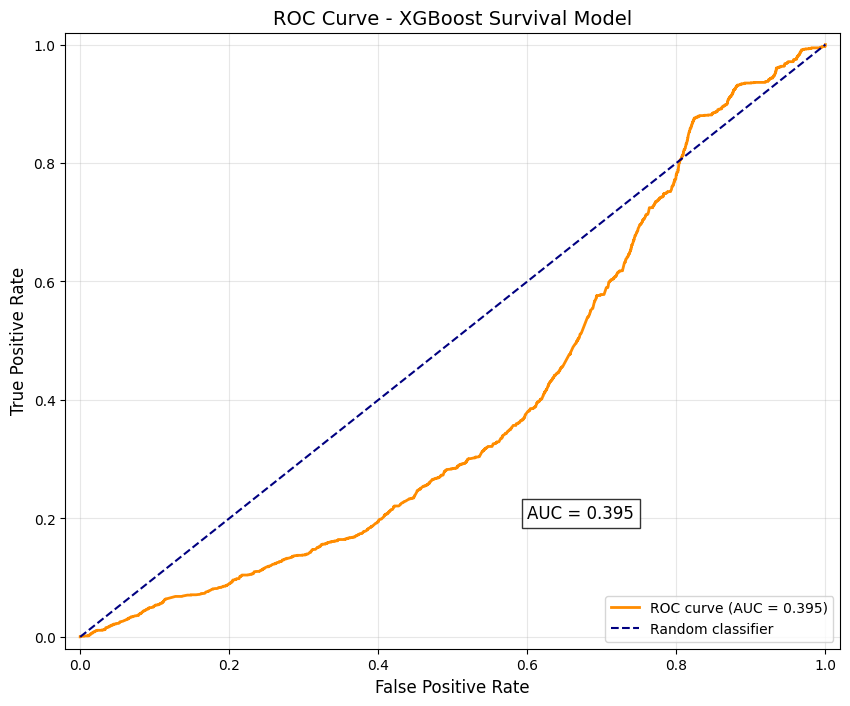

In [ ]:
###model 2 ROC curve


# Load the saved model
loaded_model = xgb.Booster()
loaded_model.load_model('/content/drive/My Drive/MS&E246/survival_xgboost_balanced.model')

# Create DMatrix for test data
dtest = xgb.DMatrix(X_test)

# Generate predictions
y_pred = loaded_model.predict(dtest)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test['Event'], -y_pred)
roc_auc = auc(fpr, tpr)

# Create ROC curve plot
plt.figure(figsize=(10, 8))

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.3f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--',
         label='Random classifier')

# Customize plot
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - XGBoost Survival Model', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)

# Add AUC value
plt.text(0.6, 0.2, f'AUC = {roc_auc:.3f}',
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Print some statistics
print("Test Set Statistics:")
print(f"Number of defaults: {sum(y_test['Event'])}")
print(f"Total samples: {len(y_test)}")
print(f"Default rate: {(sum(y_test['Event'])/len(y_test)):.3f}")
print(f"AUC Score: {roc_auc:.3f}")

plt.savefig('/content/drive/My Drive/MS&E246/survival_model_roc.png', dpi=300, bbox_inches='tight')
plt.show()